# Exploring Beat Frequencies

This simple notebook will let you play with close frequencies and hear the beatings created by intermodulation. It's also a cute example of the interactivity you can achieve with notebooks.

In [1]:
# standard bookkeeping
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display

# interactivity here:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
plt.rcParams["figure.figsize"] = (14,4)

Let's define a simple fuction that generates, plots and plays two sinusoids at the given frequencies:

In [3]:
def beat_freq(f1=220.0, f2=224.0):
    # the clock of the system
    LEN = 4 # seconds
    Fs = 8000.0
    n = np.arange(0, int(LEN * Fs))
    s = np.cos(2*np.pi * f1/Fs * n) + np.cos(2*np.pi * f2/Fs * n)
    # start from the first null of the beating frequency
    if f2 != f1:
        K = int(Fs / (2 * abs(f2-f1)))
        s = s[K:]
    # play the sound
    display(Audio(data=s, rate=Fs))
    # display one second of audio
    plt.plot(s[0:int(Fs)])

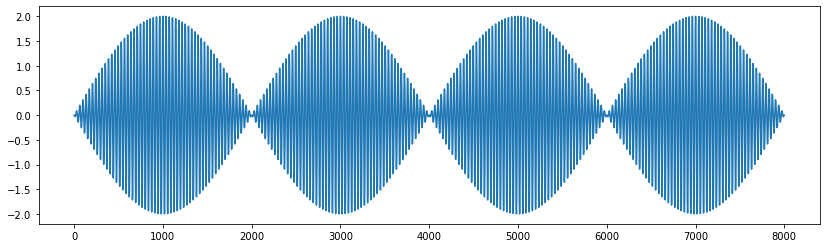

In [4]:
interact(beat_freq, f1=(200.0,300.0), f2=(200.0,300.0));